### Problem

The value of the perpetual American put in Section $5.4$ is the limit as $n\rightarrow\infty$ of the value of an American put with the same strike price 4 that expires at time $n$. When the initial stock price is $S_0=4$, the value of the perpetual American put is 1 (see $(5.4.6)$ with $j=2$). Show that the value of an American put in the same model when the initial stock price is $S_0=4$ is $0.80$ if the put expires at time $1, 0.928$ if the put expires at time $3$, and $0.96896$ if the put expires at time $5$.

### Solution

Please see the code below. $\square$

In [1]:
from collections import defaultdict

In [2]:
# intrinsic value of american put
def G(S,K):
    return K-S

In [3]:
# price an american put in a n-period binomial model with
# initial stock price S0,
# up factor u,
# interest rate 1+r,
# down factor d,
# strike price K
def time_zero_price(S0=4,u=2,r=0.25,d=0.5,n=1,K=4):
    # calculate risk-neutral probabilities from u,r,d
    p = (1+r-d)/(u-d)
    q = (u-1-r)/(u-d)
    # store derivative prices for different paths
    V = defaultdict(int)
    
    # generate prices at expiry, i.e. time n
    for i in range(2**n):
        # generate bit string
        bin_omega = (n-len(bin(i)[2:]))*'0'+bin(i)[2:]
        # corresponding omega
        omega = ''
        for bit in bin_omega:
            omega = omega + int(bit=='0')*'H' + int(bit=='1')*'T'
        # corresponding S(omega)
        S = S0
        for w in omega:
            S = S * (int((w=='H'))*u + int((w=='T'))*d)
        # corresponding V(omega)
        V[omega] = max(0, G(S,K))
        
    # generate prices for earlier times
    for t in range(n-1,1-1,-1):
        for i in range(2**t):
            # generate bit strong
            bin_omega = (t-len(bin(i)[2:]))*'0'+bin(i)[2:]
            # corresponding omega
            omega = ''
            for bit in bin_omega:
                omega = omega + int(bit=='0')*'H' + int(bit=='1')*'T'
            # corresponding S(omega)
            S = S0
            for w in omega:
                S = S * (int((w=='H'))*u + int((w=='T'))*d)
            # futre discounted price
            fdp = 1/(1+r)*(p*V[omega+'H']+q*V[omega+'T'])
            # corresponding V(omega)
            V[omega] = max(fdp, G(S,K))
            
    # time zero price
    fdp = 1/(1+r)*(p*V['H']+q*V['T'])
    V[''] = max(fdp, G(S0,K))
    return V
            
    
    
    

In [4]:
from matplotlib import pyplot as plt

In [5]:
v0 = {}
for t in range(1,11+1,2):
    v0[t] = time_zero_price(S0=4,u=2,r=0.25,d=0.5,n=t,K=4)['']

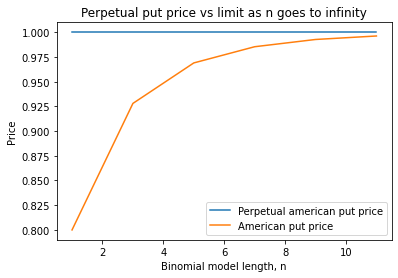

In [6]:
plt.clf()

# plot data
plt.plot([1,11], [1,1], label='Perpetual american put price')
plt.plot(v0.keys(), v0.values(), label='American put price')

# y axis
plt.ylabel('Price')

# x axis
plt.xlabel('Binomial model length, n')

# title
plt.title("Perpetual put price vs limit as n goes to infinity")

plt.legend()
plt.show()